In [8]:
import sys
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# To get functions to plot the band structure and hamiltonian
sys.path.append("../../../")
from periodiclas.tools.util import LASdata

In [9]:
# BNL* Reference values
BNLIP = -5.87
BNLEA =  -2.60

In [10]:
dpi = 200

plt.rcParams.update({
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'axes.labelsize': 28,
    'figure.dpi': dpi,
    'axes.grid': True,
    'grid.linestyle': '--',
    'figure.figsize':(16,10),
    'axes.titlesize':24
})

# SI-Fig 10

In [ ]:
def get_hamiltonian(civec, energy,diag_sub=False):
    '''
    LASSI Hamiltonian
    args:
        civec:
        energy:
    return:
        hmat:
    '''
    nstates = civec.shape[0]
    hmat = np.zeros((nstates, nstates))

    for i in range(nstates):
        hmat += np.outer(civec[:,i],civec[:,i]) * energy[i]

    if diag_sub:
        hmat = hmat - np.diag(np.diag(hmat))
    else:
        # Remove the noise
        minval = -10
        for i in range(nstates):
            hmat[i][np.where(hmat[i] != 0)] = np.log10(np.abs(hmat[i][np.where(hmat[i] != 0)]))
            hmat[i][np.where(hmat[i] < minval)] = minval #minimum shown value
            hmat[i][np.where(hmat[i] == 0)] = minval #arbitrary

    return hmat


def plot_hamiltonian(hmat, figname, cmap="magma", dpi=300, title='LASSI Hamiltonian'):
    '''
    Plot the Hamilotnian
    '''
    nstates = hmat.shape[0]

    plt.figure()
   
    ax = sns.heatmap(hmat,
            cmap=cmap,
            cbar_kws={'label': r"$\log_{10}(|H_{ij}|)$"},)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)
    cbar.set_label(r"$\log_{10}(|H_{ij}|)$",fontsize=20)

    ax.tick_params(axis='x', bottom=False, top=False)
    ax.tick_params(axis='y', left=False, right=False)
    ax.set_xticks(ticks=np.arange(0, nstates, 4))
    ax.set_yticks(ticks=np.arange(0, nstates, 4))
    ax.set_xticklabels(np.arange(0, nstates, 4),
            rotation=0, ha="center", rotation_mode='anchor')
    ax.set_yticklabels(np.arange(0, nstates, 4),
            rotation=0, ha="center", rotation_mode='anchor')

    block_centers = [
            (1 + (nstates // 4), 2 + (nstates // 2)),
            (1 + (3 * nstates // 4), nstates // 2-0.5)]
    block_labels = ["N-1 States", "N+1 States"]

    for (x, y), label in zip(block_centers, block_labels):
        plt.text(x, y, label, fontsize=24, ha='center', va='top', color='white')
    ax.yaxis.set_tick_params(pad=15)
    plt.xticks()
    plt.yticks()
    plt.title(title)
    plt.tight_layout()
    plt.savefig(figname+'ham.png', dpi=dpi, bbox_inches='tight')
    return plt

<module 'matplotlib.pyplot' from '/project/lgagliardi/jangidbhavnesh/Apps/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

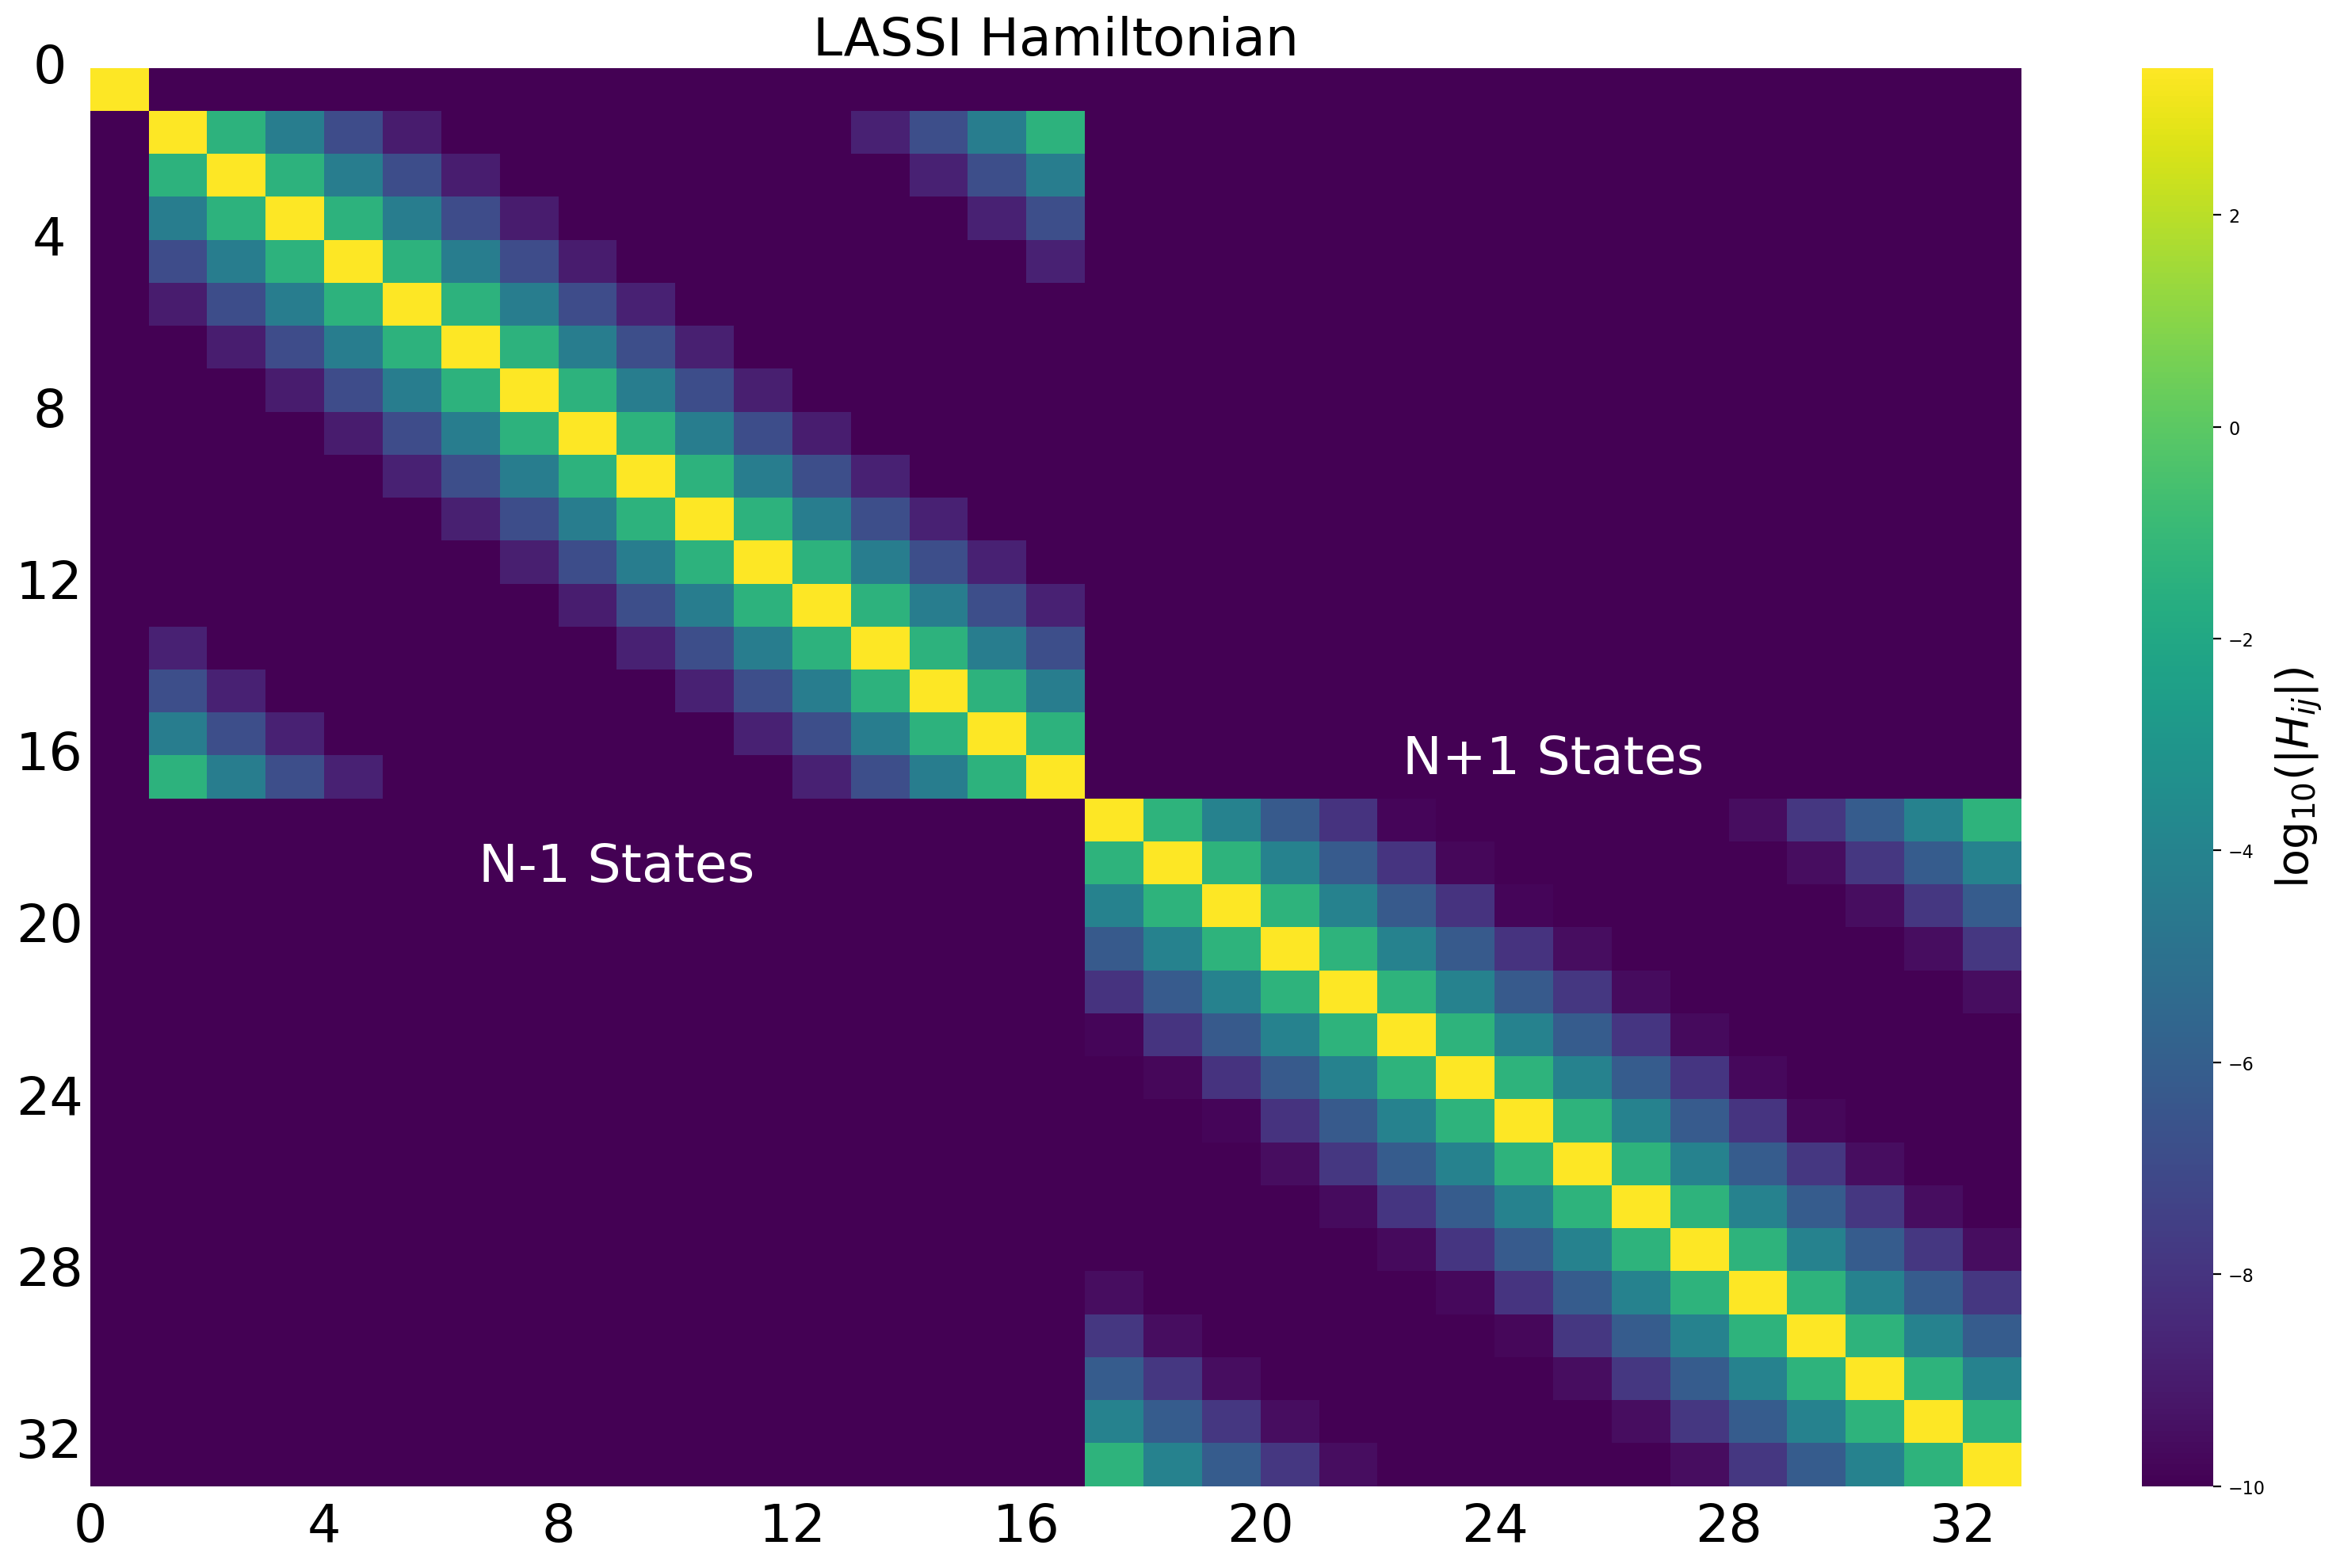

In [ ]:
# Plot the LASSI Hamiltonian
nCfrag = 4
nCT = 64
pklfile = f'PAChain.{nCfrag}.{nCT}.pkl'

lasdata = LASdata(pkl_fn=pklfile, pct_pdft=0)

hmat = get_hamiltonian(lasdata.civecs, lasdata.energies_lassi)
plot_hamiltonian(hmat, 'PAChainLASHamiltonian.', cmap="viridis", dpi=dpi)

<module 'matplotlib.pyplot' from '/project/lgagliardi/jangidbhavnesh/Apps/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

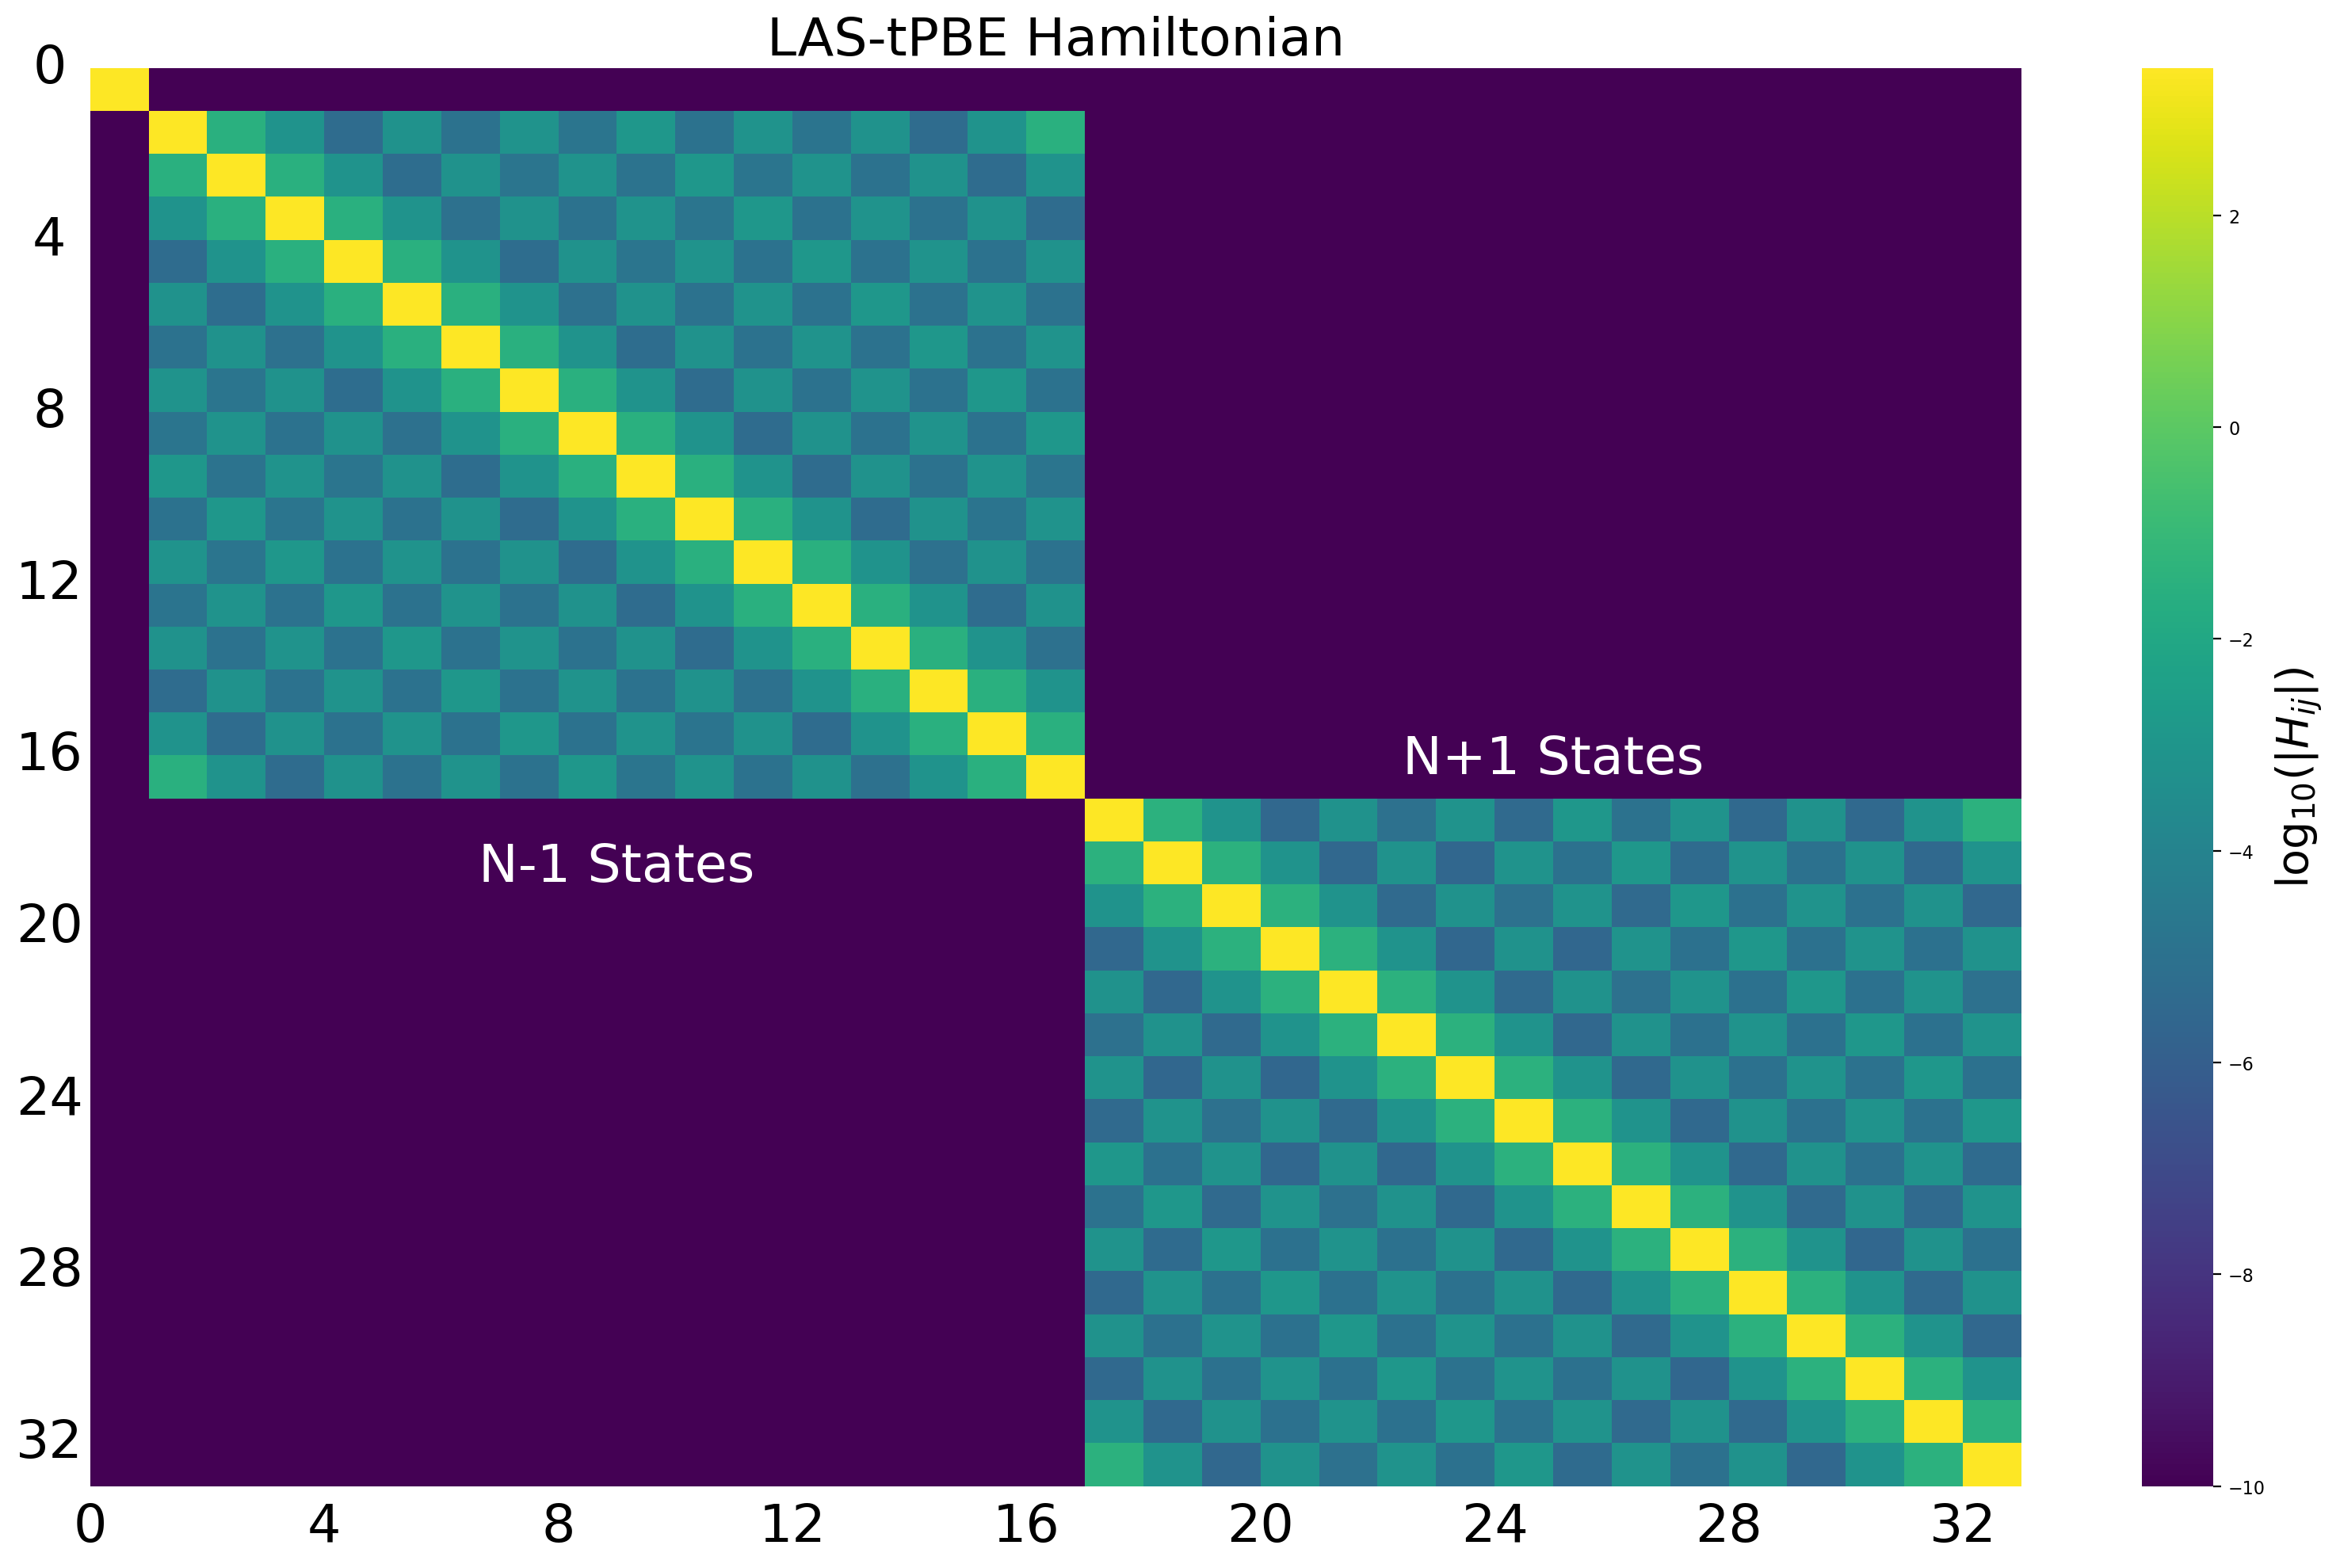

In [ ]:
# Plot the LASSI-tPBE Hamiltonian
nCfrag = 4
nCT = 64
pklfile = f'PAChain.{nCfrag}.{nCT}.pkl'

lasdata = LASdata(pkl_fn=pklfile, pct_pdft=1)

hmat = get_hamiltonian(lasdata.civecs, lasdata.energies_lassipdft)
plot_hamiltonian(hmat, 'PAChainLAStPBEHamiltonian.', cmap="viridis", dpi=dpi, title='LAS-tPBE Hamiltonian')